In [37]:
from __future__ import print_function, division
import numpy as np
import nsfg

resp = nsfg.ReadFemResp()

In [66]:
resp.timesmar.loc[resp.timesmar>5] = np.nan
resp.jintendn.loc[resp.jintendn>95] = np.nan

mar = resp.timesmar.dropna()
jin = resp.jintendn.dropna()
mar_mean, mar_var = mar.mean(), mar.var()
mar_std = np.sqrt(mar_var)

jin_mean, jin_var = jin.mean(), jin.var()
jin_std = np.sqrt(jin_var)
mar_mean, mar_std, jin_mean, jin_std

C:\Users\moyinoluwajawo\AppData\Roaming\Python\Python27\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(1.1988829528897522,
 0.4834182346581799,
 1.7388809182209468,
 1.1153669988674224)

In [67]:
import thinkstats2
import thinkplot

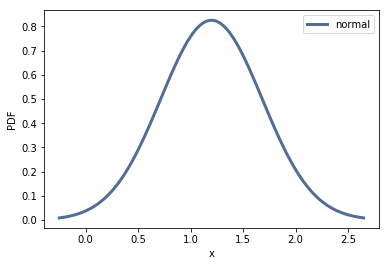

In [68]:
pdf = thinkstats2.NormalPdf(mar_mean, mar_std)
pdf.Density(mar_mean + mar_std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

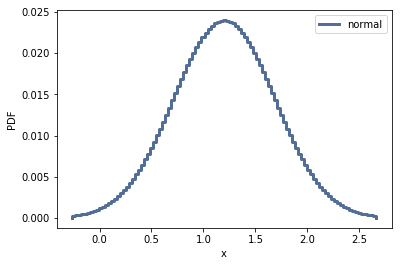

In [69]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

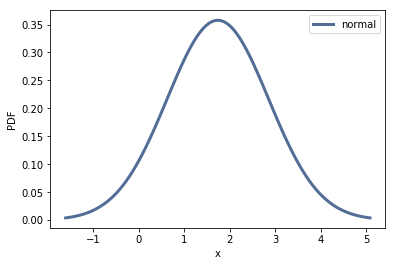

In [70]:
pdf2 = thinkstats2.NormalPdf(jin_mean, jin_std)
pdf2.Density(jin_mean + jin_std)
thinkplot.Pdf(pdf2, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

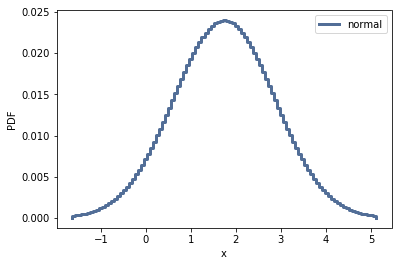

In [71]:
pmf = pdf2.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [72]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [73]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [74]:
Skewness(mar)

2.7794160544369038

In [75]:
PearsonMedianSkewness(mar)

1.2343789975091792

In [76]:
Skewness(jin)

3.5360694907939987

In [77]:
PearsonMedianSkewness(jin)

1.9880794845840513

In [78]:
%matplotlib inline

import matplotlib

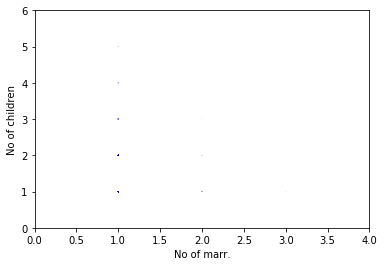

In [92]:
thinkplot.Scatter(resp.timesmar,resp.jintendn,alpha=0.01, s=2)
thinkplot.Config(xlabel='No of marr.',
                 ylabel='No of children',
                 axis=[0,4,0,6],
                 legend=False)


In [84]:
bins = np.arange(1, 6, 1)
indices = np.digitize(resp.timesmar, bins)
groups = resp.groupby(indices)
for i, group in groups:
    print(i, len(group))

1 3428
2 582
3 90
4 15
5 3528


In [86]:
mean_marr = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
mean_marr

[1.0, 2.0, 3.0, 4.0, 5.0]

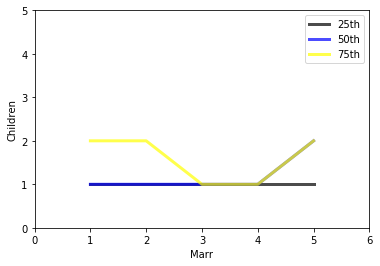

In [90]:
Colors = ["black","blue","yellow"]
Percent = [25, 50, 75]
for i in range(len(Percent)):
    jin_percentiles = [cdf.Percentile(Percent[i]) for cdf in cdfs]
    label = '%dth' % Percent[i]
    thinkplot.Plot(mean_marr, jin_percentiles, label=label,color=Colors[i])
    thinkplot.Config(xlabel='Marr',
                 ylabel='Children',
                 axis=[0, 6, 0, 5],
                 legend=True)

In [96]:
import scipy

In [99]:
scipy.stats.pearsonr(resp.timesmar, resp.jintendn)

C:\Users\moyinoluwajawo\AppData\Roaming\Python\Python27\site-packages\scipy\stats\stats.py:3012: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Users\moyinoluwajawo\AppData\Roaming\Python\Python27\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

SpearmanrResult(correlation=nan, pvalue=nan)